In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB  
import warnings;
warnings.filterwarnings('ignore');

In [2]:
df_wine = pd.read_csv("QualityPrediction.csv")  # to read the csv file using pandas

In [3]:
df = df_wine.copy()  # to make a copy of dataframe

In [4]:
df.info() # to see the information related to the dataset and observed no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.shape

(1599, 12)

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Exploratory Data Analysis( Data Visualization using Seaborn and Matplotlib)

In [7]:
# the target variable 'quality' has unique categories of 3,4,5,6,7,8
df['quality'].unique() 

array([5, 6, 7, 4, 8, 3], dtype=int64)

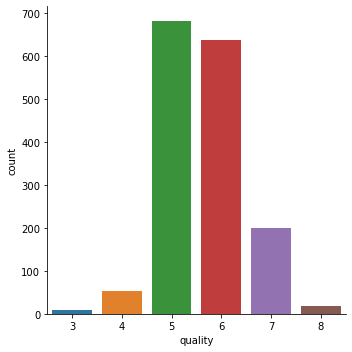

In [8]:
# The target variable 'quality' has high number of values in catagories 5,6 & 7 and 
#lower number of values in catagories 3,4,8.
sns.catplot(x ='quality', data = df, kind='count')

In [9]:
# Shows that the categorical data is imbalanced
df['quality'].value_counts()/len(df['quality']) 

5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: quality, dtype: float64

<AxesSubplot:>

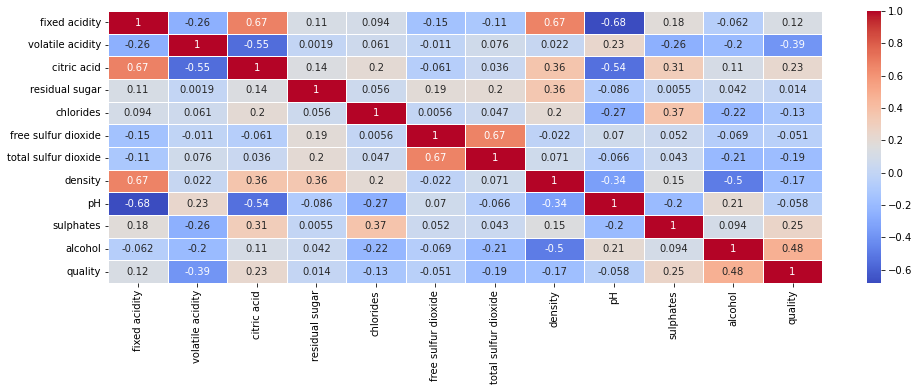

In [10]:
# From the heatmap it is observed that fixed acidity and density are positive 
# moderately correlated with co-efficent of 0.67
plt.figure(figsize = (16,5))
sns.heatmap(df.corr(), annot = True, cmap="coolwarm",linewidths=1)

In [11]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

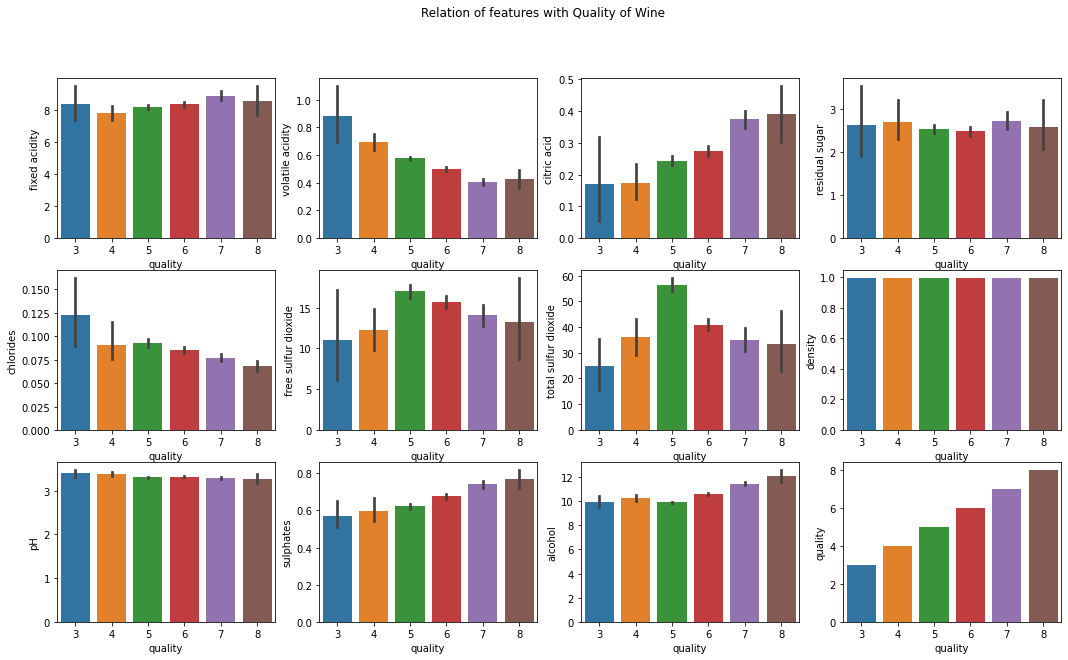

In [12]:
# The observations from the subplots are as follows
#1. Fixed acidity is not related to the quality of wine.
#2. Volatile acidity is inversely related to quality, higher the  quality,
#lower the volatile acidity.
#3. Citric acidity and quality are directly related, higher the quality, 
#higher the citric acid composition.
#4. Residual Sugar composition is almost same irrespective of wine quality.
#5. Composition of chloride is less in higher quality wines.
#6. Density and pH value is almost same irrespective of wine quality.
#7. Sulphates and alcohol composition goes higher with increase in quality of wine.
features = np.array(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol','quality'])
f = features.reshape(3,4)
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
fig.suptitle('Relation of features with Quality of Wine')
for i in range(0,3):
    for j in range(0,4):
        sns.barplot(ax=axes[i, j], data = df, x = 'quality', y = f[i,j])
        


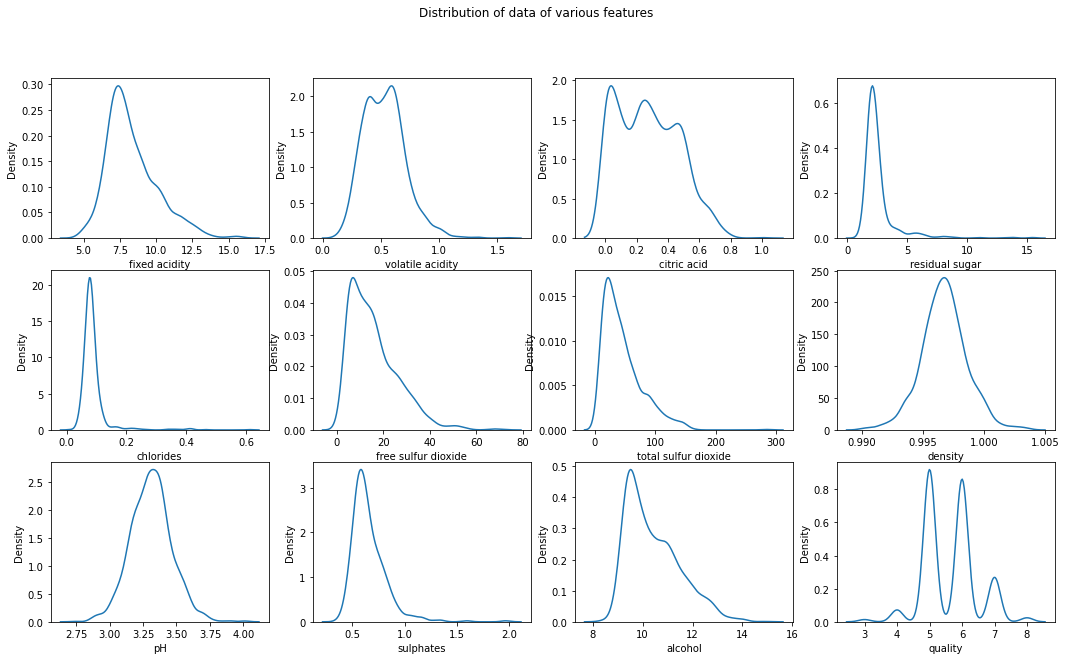

In [13]:
# Except density and pH, all the features of the dataset are right skewed
features = np.array(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol','quality'])
f = features.reshape(3,4)
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
fig.suptitle('Distribution of data of various features')
for i in range(0,3):
    for j in range(0,4):
        sns.kdeplot(ax=axes[i, j], data = df, x = f[i,j] )
        

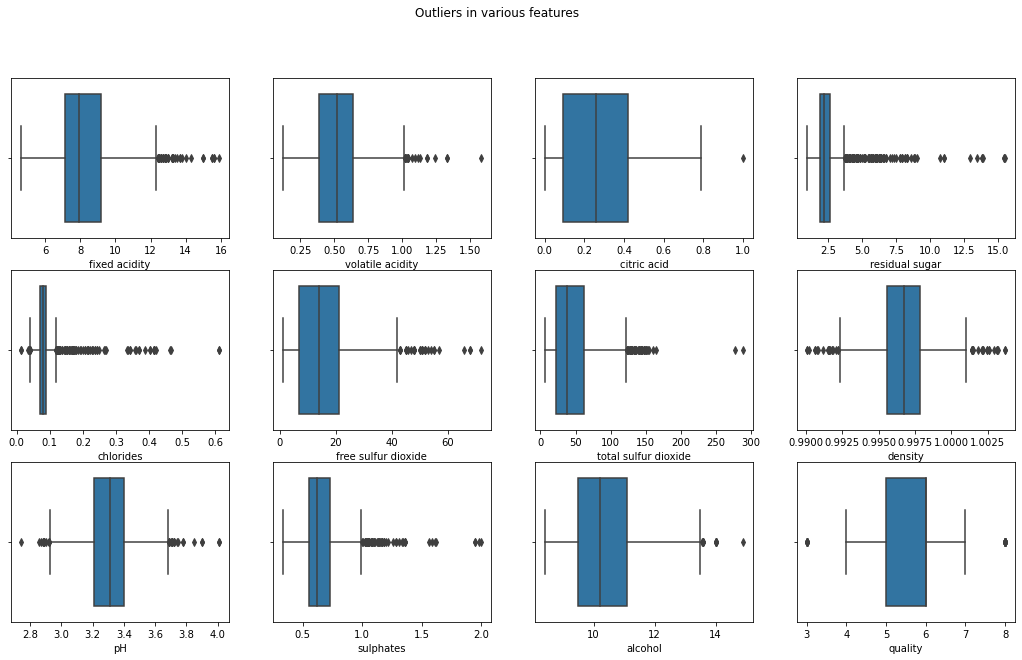

In [14]:
# All the features of the dataset has outliers
features = np.array(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol','quality'])
f = features.reshape(3,4)
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
fig.suptitle('Outliers in various features')
for i in range(0,3):
    for j in range(0,4):
        sns.boxplot(ax=axes[i, j], data = df, x = f[i,j] )

# 2. Data preprocessing

In [15]:
#From the boxplot of EDA part, it is observed that, almost all the features of data 
#are right skewed, hence using RobustScaler() preprocessing method for feature scaling
X = df.drop('quality',axis=1).values 
scaler = RobustScaler()
df_scale= pd.DataFrame(scaler.fit_transform(X), columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'])   
df_scale


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.238095,0.72,-0.787879,-0.428571,-0.15,-0.214286,-0.100,0.469799,1.052632,-0.333333,-0.5000
1,-0.047619,1.44,-0.787879,0.571429,0.95,0.785714,0.725,0.022371,-0.578947,0.333333,-0.2500
2,-0.047619,0.96,-0.666667,0.142857,0.65,0.071429,0.400,0.111857,-0.263158,0.166667,-0.2500
3,1.571429,-0.96,0.909091,-0.428571,-0.20,0.214286,0.550,0.559284,-0.789474,-0.222222,-0.2500
4,-0.238095,0.72,-0.787879,-0.428571,-0.15,-0.214286,-0.100,0.469799,1.052632,-0.333333,-0.5000
...,...,...,...,...,...,...,...,...,...,...,...
1594,-0.809524,0.32,-0.545455,-0.285714,0.55,1.285714,0.150,-0.827740,0.736842,-0.222222,0.1875
1595,-0.952381,0.12,-0.484848,0.000000,-0.85,1.785714,0.325,-0.729306,1.105263,0.777778,0.6250
1596,-0.761905,-0.04,-0.393939,0.142857,-0.15,1.071429,0.050,-0.451902,0.578947,0.722222,0.5000
1597,-0.952381,0.50,-0.424242,-0.285714,-0.20,1.285714,0.150,-0.572707,1.368421,0.500000,0.0000


In [16]:
# Since more features are involved in the dataset, using VIF to evaluate multicollinearity.
# Fixed acidity and density are multicollinear with respect to other features in the dataset 
# as the VIF > 5. 
 
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["Feature"] = df_scale.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_scale.values, i)
                          for i in range(len(df_scale.columns))]
vif_data = vif_data.sort_values(by = "VIF", ascending = False)
  
print(vif_data)

                 Feature       VIF
0          fixed acidity  5.711998
7                density  5.250172
10               alcohol  3.088076
2            citric acid  2.991682
8                     pH  2.789818
6   total sulfur dioxide  2.148662
5    free sulfur dioxide  2.012653
1       volatile acidity  1.792550
3         residual sugar  1.611141
9              sulphates  1.454095
4              chlorides  1.442854


In [18]:
df_scale['quality']=df['quality'].values
df_scale

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.238095,0.72,-0.787879,-0.428571,-0.15,-0.214286,-0.100,0.469799,1.052632,-0.333333,-0.5000,5
1,-0.047619,1.44,-0.787879,0.571429,0.95,0.785714,0.725,0.022371,-0.578947,0.333333,-0.2500,5
2,-0.047619,0.96,-0.666667,0.142857,0.65,0.071429,0.400,0.111857,-0.263158,0.166667,-0.2500,5
3,1.571429,-0.96,0.909091,-0.428571,-0.20,0.214286,0.550,0.559284,-0.789474,-0.222222,-0.2500,6
4,-0.238095,0.72,-0.787879,-0.428571,-0.15,-0.214286,-0.100,0.469799,1.052632,-0.333333,-0.5000,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-0.809524,0.32,-0.545455,-0.285714,0.55,1.285714,0.150,-0.827740,0.736842,-0.222222,0.1875,5
1595,-0.952381,0.12,-0.484848,0.000000,-0.85,1.785714,0.325,-0.729306,1.105263,0.777778,0.6250,6
1596,-0.761905,-0.04,-0.393939,0.142857,-0.15,1.071429,0.050,-0.451902,0.578947,0.722222,0.5000,6
1597,-0.952381,0.50,-0.424242,-0.285714,-0.20,1.285714,0.150,-0.572707,1.368421,0.500000,0.0000,5


# Prediction using various ML models for multiclassification.

As the target variable is available in the dataset, I am using supervised ML models 
to predict the output and target variable is categorical data, i am using classification
models such linear regression, Decision tree, Random forest, KNN, Naive Bayes and Support 
Vector Machine learning models for prediction. As scaling is not required for Decision tree,
NB and Random forest models, so using unscaled data for prediction. For remaining all the models 
except Decision,NB and Random forest, I am using scaled data for prediction( Scaled data is 
represented with X and Y), unscaled data represented with x and y.

# 1. Logistic Regression ML model

Logistic Regression ML model is distance based model, using scaled data 
into the model for prediction

In [19]:
X = df_scale.drop('quality',axis=1).values

In [20]:
Y = df_scale['quality'].values

In [21]:
# X_train, X_test represents scaled data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0) 

In [22]:
# instanstiation of LogisticRegression

log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train,Y_train) 
print(log_reg.fit(X_train,Y_train))

LogisticRegression(random_state=0)


In [23]:
Y_pred_LR=log_reg.predict(X_test)

In [24]:
# the confusion matrix shows the same format everytime: (TN , FP, FN , TP) 
# with actuals being the rows and predicted being the columns.

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test,Y_pred_LR)
conf_matrix      #Check   ()

array([[  0,   0,   2,   0,   0,   0],
       [  0,   0,   9,   4,   1,   0],
       [  0,   0, 130,  39,   0,   0],
       [  0,   0,  46, 108,  16,   0],
       [  0,   0,   3,  22,  15,   0],
       [  0,   0,   0,   3,   2,   0]], dtype=int64)

In [25]:
print("Accuracy: ",accuracy_score(Y_test,Y_pred_LR))   

Accuracy:  0.6325


In [26]:
print(classification_report(Y_test,Y_pred_LR))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        14
           5       0.68      0.77      0.72       169
           6       0.61      0.64      0.62       170
           7       0.44      0.38      0.41        40
           8       0.00      0.00      0.00         5

    accuracy                           0.63       400
   macro avg       0.29      0.30      0.29       400
weighted avg       0.59      0.63      0.61       400



In [27]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(log_reg, X_train, Y_train, cv=5)
scores.mean()

0.5788145048814505

The accuracy obtained using Logistic Regression ML model is 63%.

# 2. Decision tree ML model using Hyperparameter tuning

In [30]:
x = df.drop('quality',axis=1).values 
y = df['quality'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [31]:
# Set the random state for reproducibility
fit_dt = DecisionTreeClassifier(random_state=0)

In [32]:
# Providing the different values of hyperparameters
param_dist_dt = {'max_depth': [2, 3, 4, 8, 16],
              'max_features': ['auto', 'sqrt', 'log2'],
               'criterion': ['gini', 'entropy'],
             'max_leaf_nodes':[4,8,16,32,64],
             "random_state":[0,1,2,3,4,5]}

# Running gridsearchCV to check for all the different PnCs of these parameter values
cv_dt= GridSearchCV(fit_dt,cv = 10,
                     param_grid=param_dist_dt, 
                     n_jobs = 3)

#Fitting the train set , so that grid search is executed on this dataset
cv_dt.fit(x_train, y_train)

#Printing the best parameters by using best_params
print('Best Parameters using grid search: \n', cv_dt.best_params_)

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'max_leaf_nodes': 16, 'random_state': 2}


In [33]:
#Finally the best parameters are specified

fit_dt.set_params(criterion = 'gini',
                  max_features = 'auto',
                  max_leaf_nodes = 16,
                  max_depth = 4,
                  random_state = 2)


DecisionTreeClassifier(max_depth=4, max_features='auto', max_leaf_nodes=16,
                       random_state=2)

In [34]:
# Prediction of target variable

fit_dt.fit(x_train, y_train)
y_pred_dt = fit_dt.predict(x_test)

In [35]:
print(confusion_matrix(y_test,y_pred_dt))

[[  0   0   1   1   0   0]
 [  0   0   8   5   1   0]
 [  0   0 110  52   7   0]
 [  0   0  44 101  25   0]
 [  0   0   3  21  16   0]
 [  0   0   0   2   3   0]]


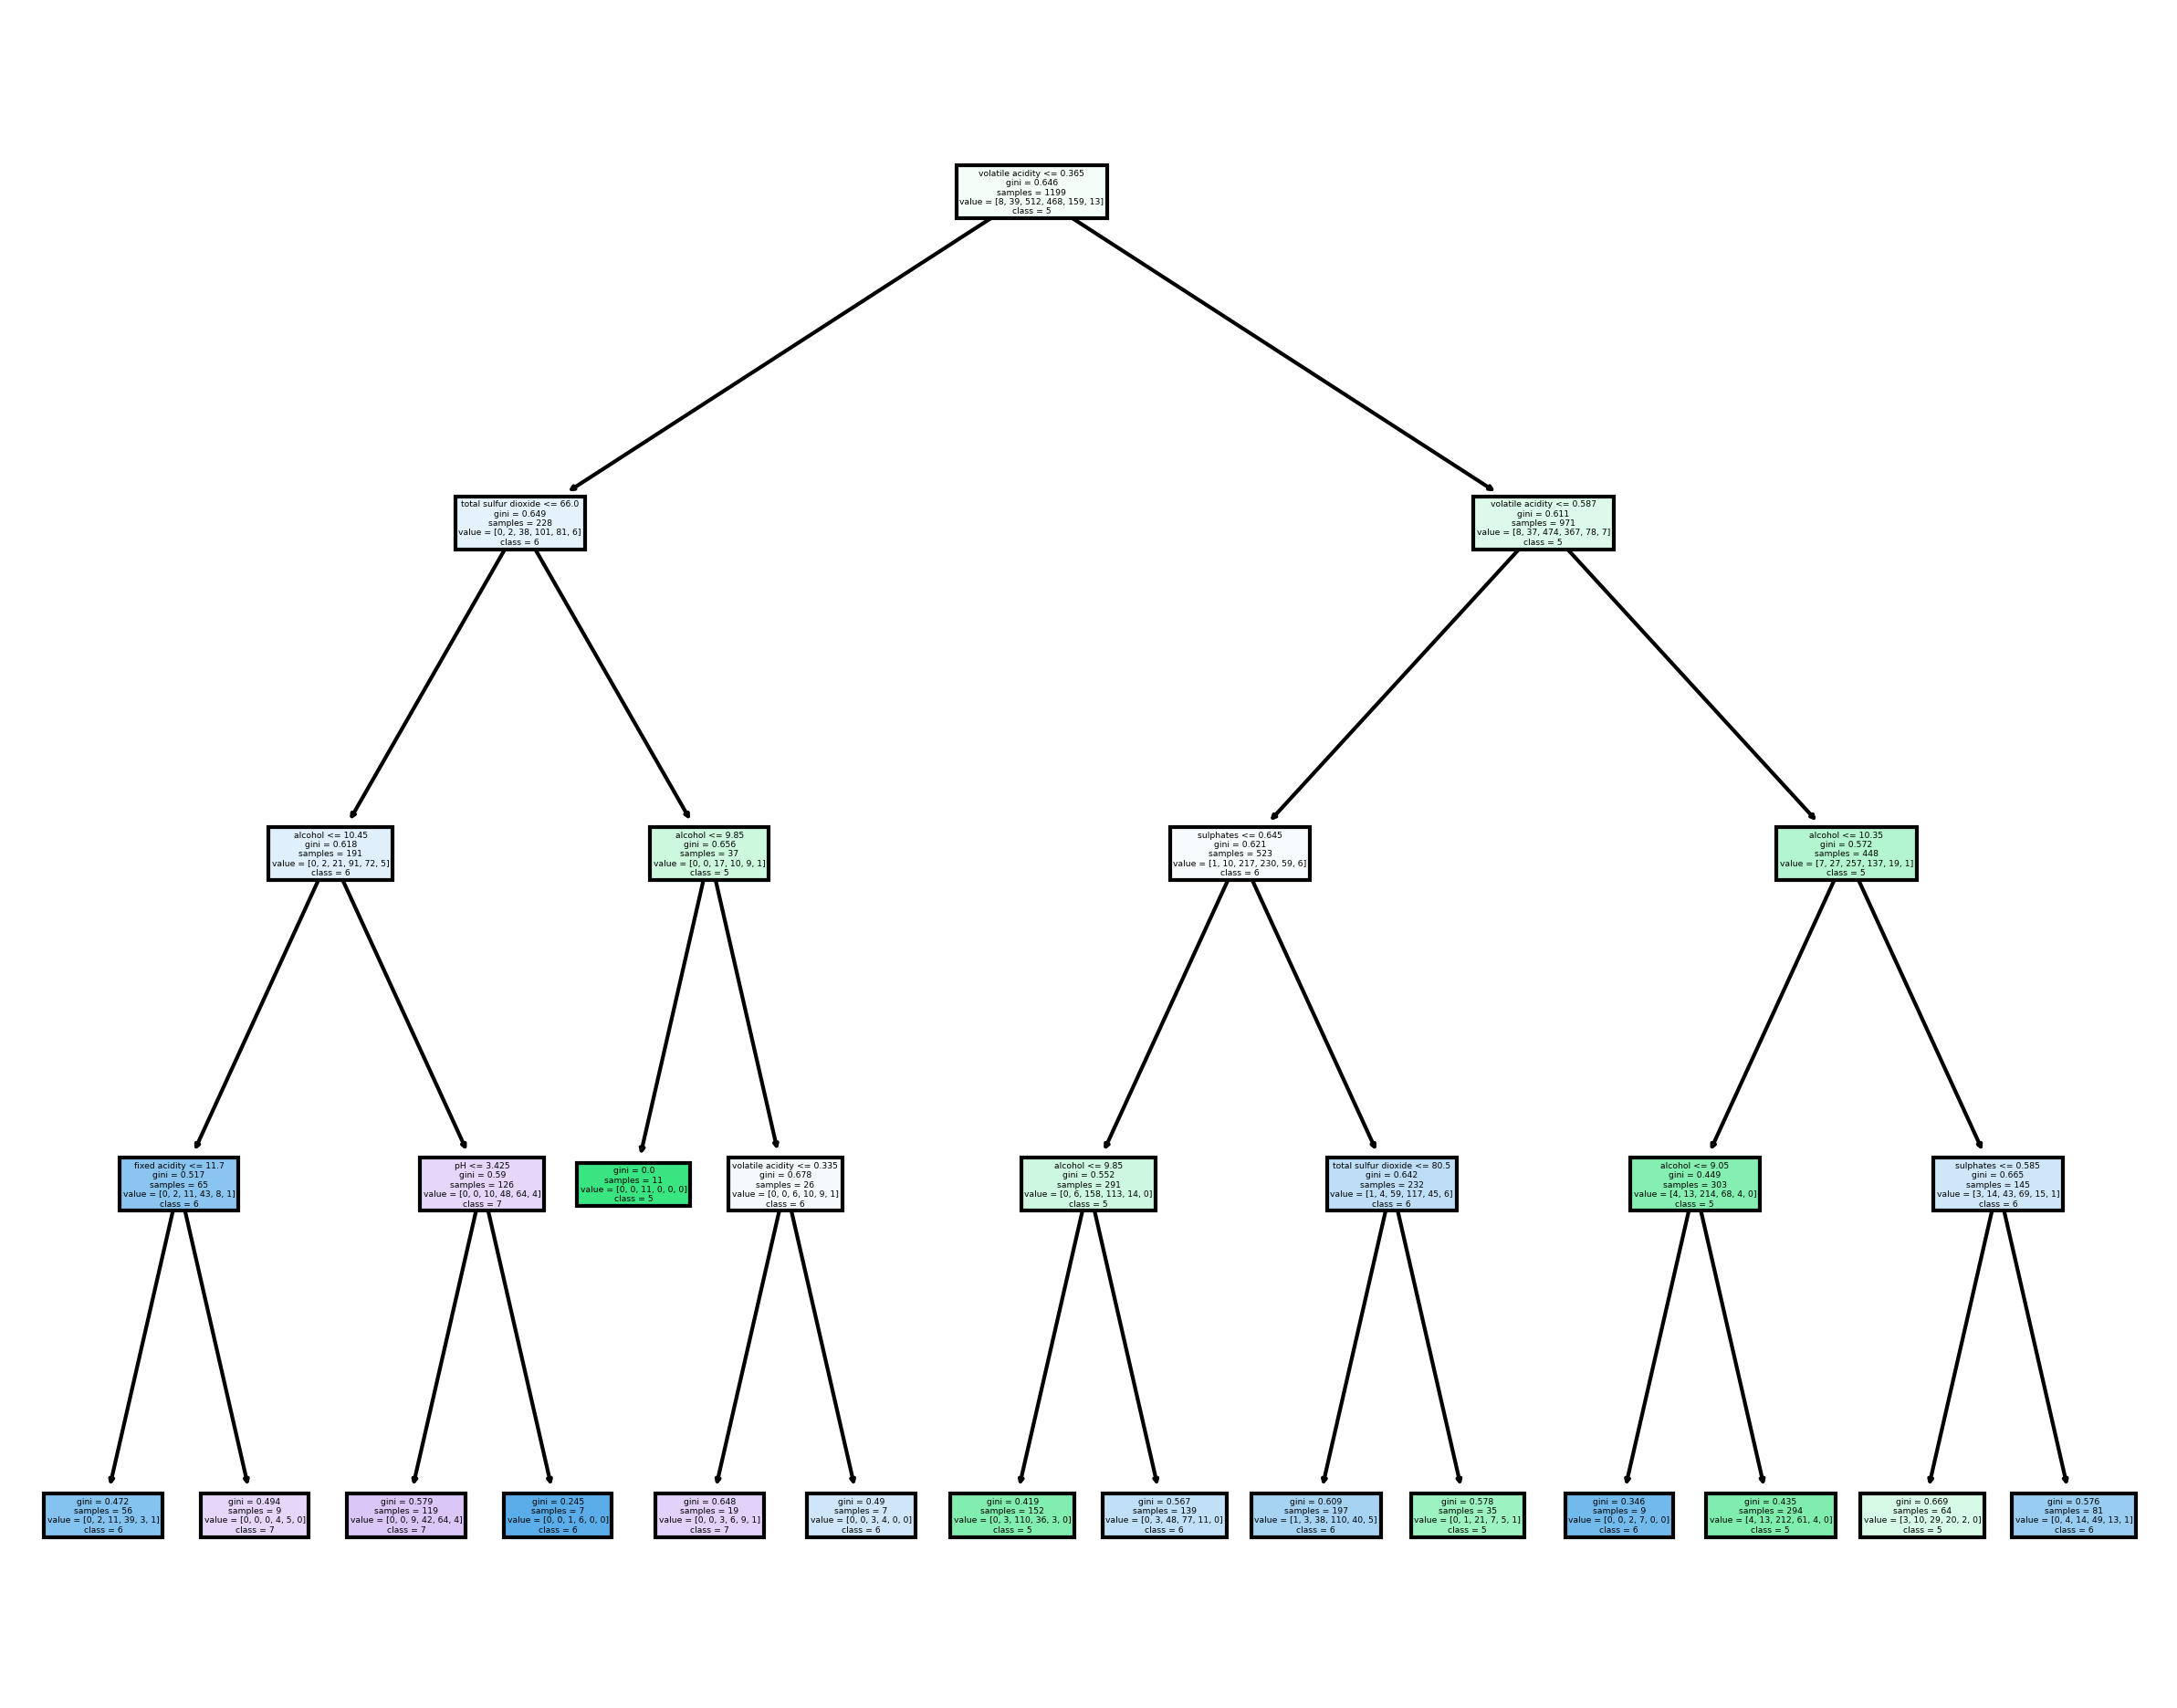

In [36]:
from sklearn import tree
df1=pd.DataFrame(df.drop(['quality'],axis=1))
column_names=list(df1.columns)
fn=column_names
cn=['3','4','5','6','7','8']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,8), dpi=300)

tree.plot_tree(fit_dt,
           feature_names = fn, 
           class_names=cn,
           filled = True);

fig.savefig('DecisionTree.png')

In [37]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        14
           5       0.66      0.65      0.66       169
           6       0.55      0.59      0.57       170
           7       0.31      0.40      0.35        40
           8       0.00      0.00      0.00         5

    accuracy                           0.57       400
   macro avg       0.25      0.27      0.26       400
weighted avg       0.55      0.57      0.56       400



In [38]:
print(accuracy_score(y_test,y_pred_dt))

0.5675


In [39]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(DecisionTreeClassifier(max_depth=2), x_train, y_train, cv=5)
scores.mean()

0.5388040446304044

The accuracy obtained using Decision tree ML model is 57%.

# 3. Random Forest ML model using hyperparameter tuning

In [67]:
# Instantiation of RandomForestClassifier
fit_rf = RandomForestClassifier(random_state=0)

In [69]:
# Providing the different values of hyperparameters
param_dist = {'max_depth': [2, 3, 4, 8, 16],
              'max_features': ['auto', 'sqrt', 'log2', None],
                'bootstrap' : [True, False],
              'criterion': ['gini', 'entropy']}

# Running gridsearchCV to check for all the different PnCs of these parameter values
cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

#Fitting the train set , so that grid search is executed on this dataset
cv_rf.fit(x_train, y_train)

#Printing the best parameters by using best_params
print('Best Parameters using grid search: \n', cv_rf.best_params_)

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 16, 'max_features': 'log2'}


In [75]:
#Finally the best parameters are specified

fit_rf.set_params(criterion = 'entropy',
                  max_features = 'log2', 
                  bootstrap = True,
                  max_depth = 16)

RandomForestClassifier(criterion='entropy', max_depth=16, max_features='log2')

In [76]:
# prediction of target variable
fit_rf.fit(x_train, y_train)
y_pred_rf = fit_rf.predict(x_test)

In [77]:
print(confusion_matrix(y_test,y_pred_rf))

[[  0   0   0   2   0   0]
 [  0   0  10   4   0   0]
 [  0   0 128  40   1   0]
 [  0   0  32 126  12   0]
 [  0   0   2  12  24   2]
 [  0   0   0   2   3   0]]


In [78]:
print(accuracy_score(y_test,y_pred_rf))

0.695


In [79]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        14
           5       0.74      0.76      0.75       169
           6       0.68      0.74      0.71       170
           7       0.60      0.60      0.60        40
           8       0.00      0.00      0.00         5

    accuracy                           0.69       400
   macro avg       0.34      0.35      0.34       400
weighted avg       0.66      0.69      0.68       400



In [80]:
#  To crossvalidate the dataset

from sklearn.model_selection import cross_val_score

scores = cross_val_score(fit_rf, x_train, y_train, cv=5)
scores.mean()

0.6622175732217574

The accuracy of Random forest ML model is 69%.

# 4. K-Nearest Neighbours ML model  

In [88]:
# Instantiation
knn = KNeighborsClassifier() 

# Providing the different values of hyperparameters
param_dist = {'n_neighbors': list(range(1,40)),
              }

# Running gridsearchCV to check for all the different PnCs of these parameter values
cv_knn = GridSearchCV(knn, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

#Fitting the train set , so that grid search is executed on this dataset
cv_knn.fit(X_train, Y_train)

#Printing the best parameters by using best_params
print('Best Parameters using grid search: \n', cv_knn.best_params_)

Best Parameters using grid search: 
 {'n_neighbors': 1}


In [94]:
#Finally using the optimum value of K = 1
knn = KNeighborsClassifier(n_neighbors = 1) 
knn.fit(X_train,Y_train)                           #fit
Y_pred_knn = knn.predict(X_test)                   #Predict

print(confusion_matrix(Y_test,Y_pred_knn))

[[  0   1   0   1   0   0]
 [  0   0   6   8   0   0]
 [  0   3 114  39  11   2]
 [  0   4  38 106  22   0]
 [  0   0   4   9  24   3]
 [  0   0   1   3   1   0]]


In [95]:
print(accuracy_score(Y_test,Y_pred_knn))

0.61


In [96]:
print(classification_report(Y_test,Y_pred_knn))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        14
           5       0.70      0.67      0.69       169
           6       0.64      0.62      0.63       170
           7       0.41      0.60      0.49        40
           8       0.00      0.00      0.00         5

    accuracy                           0.61       400
   macro avg       0.29      0.32      0.30       400
weighted avg       0.61      0.61      0.61       400



In [97]:
accuracy_rate = []
for i in range(1,40):    # May take some time
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_scale.iloc[:, df_scale.columns != 'quality'],df_scale['quality'],cv=10)
    accuracy_rate.append(score.mean())
    
#For different number of neighbors the model is run several times using FOR loop
# cross_val_score returns the accuracy score of all the 10 validations done since cv = 10
# In the Accuracy list the mean of all 10 scores is stored.

#Hence we have the mean accuracy score for each iteration.

Text(0, 0.5, 'Accuracy Rate')

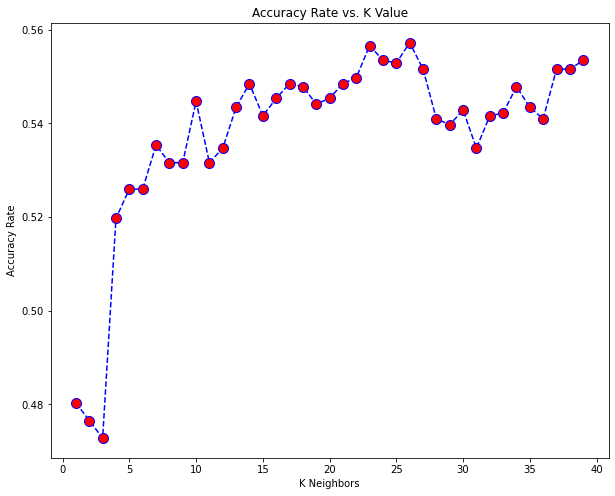

In [98]:
#Plotting the mean accuracy socre against all the K values

plt.figure(figsize = (10,8))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K Neighbors')
plt.ylabel('Accuracy Rate')

The accuracy obtained using KNN ML model is 61%

5. Prediction using Naive Bayes ML model

In [99]:
# Instantiation of Gaussian Classifier
model = GaussianNB()

# Train the model
model.fit(x_train, y_train)

GaussianNB()

In [100]:
# Predict Output 
y_pred_nb = model.predict(x_test)
print(confusion_matrix(y_test, y_pred_nb))

[[  0   0   1   1   0   0]
 [  0   0   9   5   0   0]
 [  3   7 111  40   8   0]
 [  0   4  42  86  34   4]
 [  1   0   0  13  23   3]
 [  0   0   0   2   3   0]]


In [101]:
print(accuracy_score(y_test,y_pred_nb))

0.55


In [102]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        14
           5       0.68      0.66      0.67       169
           6       0.59      0.51      0.54       170
           7       0.34      0.57      0.43        40
           8       0.00      0.00      0.00         5

    accuracy                           0.55       400
   macro avg       0.27      0.29      0.27       400
weighted avg       0.57      0.55      0.56       400



The accuracy obtained using Naive Bayes ML model is 55%.

6. Prediction using SVM ML model  

In [103]:
from sklearn.svm import SVC     #support Vector Classifier
                                #default kernel is rbf
svc = SVC(random_state = 5)
svc.fit(X_train,Y_train)
Y_pred_svc = svc.predict(X_test)

In [104]:
print(confusion_matrix(Y_test,Y_pred_svc))

[[  0   0   1   1   0   0]
 [  0   0   9   5   0   0]
 [  0   0 124  44   1   0]
 [  0   0  48 117   5   0]
 [  0   0   3  25  12   0]
 [  0   0   0   2   3   0]]


In [105]:
print(accuracy_score(Y_test,Y_pred_svc))

0.6325


In [106]:
print(classification_report(Y_test,Y_pred_svc))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        14
           5       0.67      0.73      0.70       169
           6       0.60      0.69      0.64       170
           7       0.57      0.30      0.39        40
           8       0.00      0.00      0.00         5

    accuracy                           0.63       400
   macro avg       0.31      0.29      0.29       400
weighted avg       0.60      0.63      0.61       400



The accuracy of SVM ML model is 63%

The accuracy observed from the different models for multi-classification are as follows
1. Logistic regression model  - 63%
2. Decision tree model - 57%
3. Random forest model - 69%
4. KNN model           - 59%
5. Naive Bayes         - 55%
6. Support Vector ML   - 63%